In [ ]:
import tensorflow as tf
print(tf.__version__)

2.8.0


In [ ]:
!mkdir ~/.kaggle #create the .kaggle folder in your root directory
!echo '{"username":"crosstar","key":"0466b885413a80ab226f7c46625220e8"}' > ~/.kaggle/kaggle.json #write kaggle API credentials to kaggle.json
!chmod 600 ~/.kaggle/kaggle.json  # set permissions
!pip install kaggle #install the kaggle library
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 58 kB 2.4 MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-py3-none-any.whl size=73051 sha256=6c9d020513bea7b20d5bc46b1f9584a368a6368a4fc26c8c5e1660d0b77a17d8
  Stored in directory: /root/.cache/pip/wheels/62/d6/58/5853130f941e75b2177d281eb7e44b4a98ed46dd155f556dc5
Successfully built kaggle
  Attempting uninstall: kaggle
    Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle competitions download -c h-and-m-personalized-fashion-recommendations

100% 28.7G/28.7G [03:40<00:00, 165MB/s]
100% 28.7G/28.7G [03:40<00:00, 140MB/s]


In [ ]:
!unzip h-and-m-personalized-fashion-recommendations.zip -d ./kaggle_h_and_m

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: ./kaggle_h_and_m/images/089/0890677001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890677002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890677004.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890683001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890683002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890684001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890684002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890686002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890697001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890697002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890700001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890717001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890717002.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890717003.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890722001.jpg  
  inflating: ./kaggle_h_and_m/images/089/0890722002.jpg  
  inflating: ./kaggle_h_and_m/images

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## the number of data
- `article` : 10만개 items
- `customer` : 137만명 고객
- `train` : 3000만 건의 구매기록
- `submission` : 137만명 고객 별 12개 article 예측하기


In [ ]:
article_df = pd.read_csv('/content/kaggle_h_and_m/articles.csv')
customer_df = pd.read_csv('/content/kaggle_h_and_m/customers.csv')
train_df = pd.read_csv('/content/kaggle_h_and_m/transactions_train.csv')
submission_df = pd.read_csv('/content/kaggle_h_and_m/sample_submission.csv')

In [ ]:
article_df.shape, customer_df.shape, train_df.shape, submission_df.shape

((105542, 25), (1371980, 7), (31788324, 5), (1371980, 2))

In [ ]:
article_df.head()

,article_id,product_code,prod_name,product_type_no,product_type_name,product_group_name,graphical_appearance_no,graphical_appearance_name,colour_group_code,colour_group_name,...,department_name,index_code,index_name,index_group_no,index_group_name,section_no,section_name,garment_group_no,garment_group_name,detail_desc
0,108775015,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,9,Black,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
1,108775044,108775,Strap top,253,Vest top,Garment Upper body,1010016,Solid,10,White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
2,108775051,108775,Strap top (1),253,Vest top,Garment Upper body,1010017,Stripe,11,Off White,...,Jersey Basic,A,Ladieswear,1,Ladieswear,16,Womens Everyday Basics,1002,Jersey Basic,Jersey top with narrow shoulder straps.
3,110065001,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,9,Black,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."
4,110065002,110065,OP T-shirt (Idro),306,Bra,Underwear,1010016,Solid,10,White,...,Clean Lingerie,B,Lingeries/Tights,1,Ladieswear,61,Womens Lingerie,1017,"Under-, Nightwear","Microfibre T-shirt bra with underwired, moulde..."


In [ ]:
# article_df.groupby('product_group_name').count()
# 상위 5개 노출
article_df.product_group_name.value_counts()

Garment Upper body       42741
Garment Lower body       19812
Garment Full body        13292
Accessories              11158
Underwear                 5490
Shoes                     5283
Swimwear                  3127
Socks & Tights            2442
Nightwear                 1899
Unknown                    121
Underwear/nightwear         54
Cosmetic                    49
Bags                        25
Items                       17
Furniture                   13
Garment and Shoe care        9
Stationery                   5
Interior textile             3
Fun                          2
Name: product_group_name, dtype: int64

- 결측치 확인 : description에 416개, 나머진 없음

In [ ]:
article_df.isnull().sum()

article_id                        0
product_code                      0
prod_name                         0
product_type_no                   0
product_type_name                 0
product_group_name                0
graphical_appearance_no           0
graphical_appearance_name         0
colour_group_code                 0
colour_group_name                 0
perceived_colour_value_id         0
perceived_colour_value_name       0
perceived_colour_master_id        0
perceived_colour_master_name      0
department_no                     0
department_name                   0
index_code                        0
index_name                        0
index_group_no                    0
index_group_name                  0
section_no                        0
section_name                      0
garment_group_no                  0
garment_group_name                0
detail_desc                     416
dtype: int64

## 1. check kind of column values (n-unique elements)

article_id : 105542 kind of elements
product_code : 47224 kind of elements
prod_name : 45875 kind of elements
product_type_no : 132 kind of elements
product_type_name : 131 kind of elements
product_group_name : 19 kind of elements
graphical_appearance_no : 30 kind of elements
graphical_appearance_name : 30 kind of elements
colour_group_code : 50 kind of elements
colour_group_name : 50 kind of elements
perceived_colour_value_id : 8 kind of elements
perceived_colour_value_name : 8 kind of elements
perceived_colour_master_id : 20 kind of elements
perceived_colour_master_name : 20 kind of elements
department_no : 299 kind of elements
department_name : 250 kind of elements
index_code : 10 kind of elements
index_name : 10 kind of elements
index_group_no : 5 kind of elements
index_group_name : 5 kind of elements
section_no : 57 kind of elements
section_name : 56 kind of elements
garment_group_no : 21 kind of elements
garment_group_name : 21 kind of elements
detail_desc : 43405 kind of element

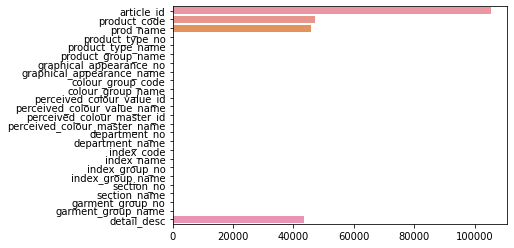

In [ ]:
# check the unique values
unique_list = []
for i in article_df.columns:
  val=len(article_df[i].unique())
  print(f'{i} : {val} kind of elements')
  unique_list.append(val)
sns.barplot(y=article_df.columns, x=unique_list)  

> product_name, product_code, detailed desc correspond to each article_id, maybe.

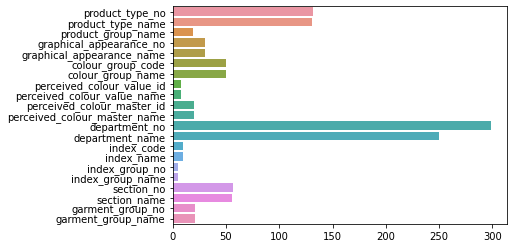

In [ ]:
#article id,  product name, description 제외하고 다시 count
sns.barplot(y=article_df.columns[3:-1], x=unique_list[3:-1])

### A. `Product_group`, `index_group`, `index_name`, `garment_group` are worth checking histogram.

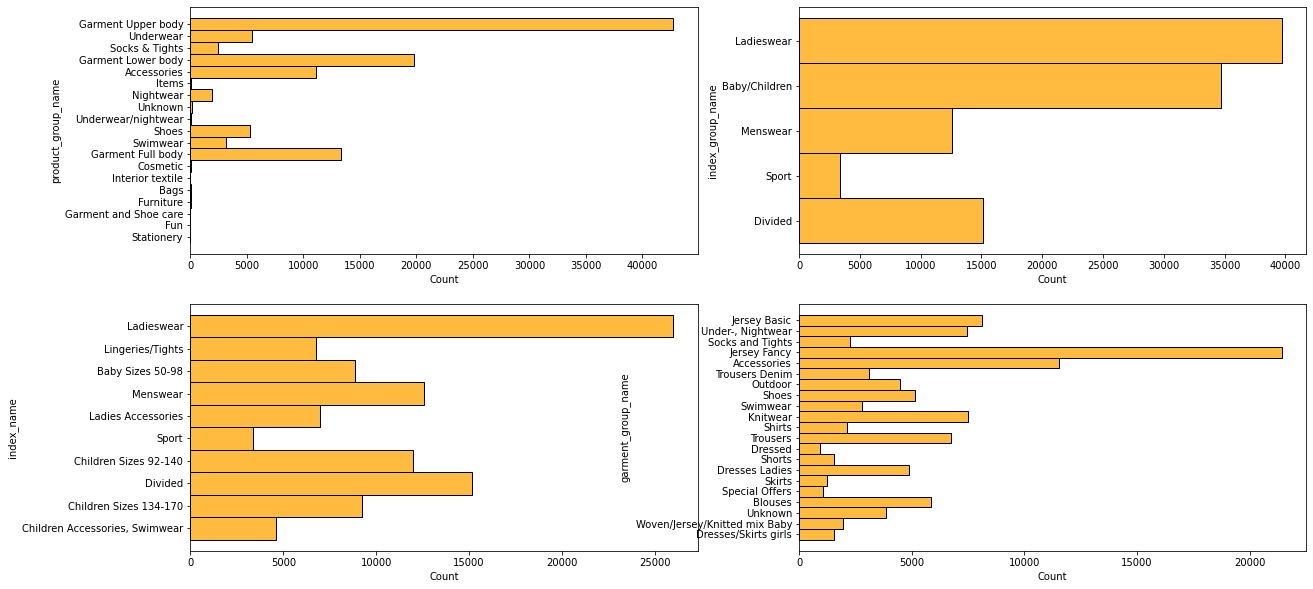

In [ ]:
fig, axes = plt.subplots(nrows=2,ncols=2, figsize=(20,10)) # 가로 세로

col = [['product_group_name', 'index_group_name'], ['index_name', 'garment_group_name']]
for i in range(2):
  for j in range(2):
    sns.histplot(ax=axes[i,j], data = article_df, y = col[i][j], color='orange')
    # axes[0].set_title(col[i][j].upper())

> `garment group` histogram by `index group`

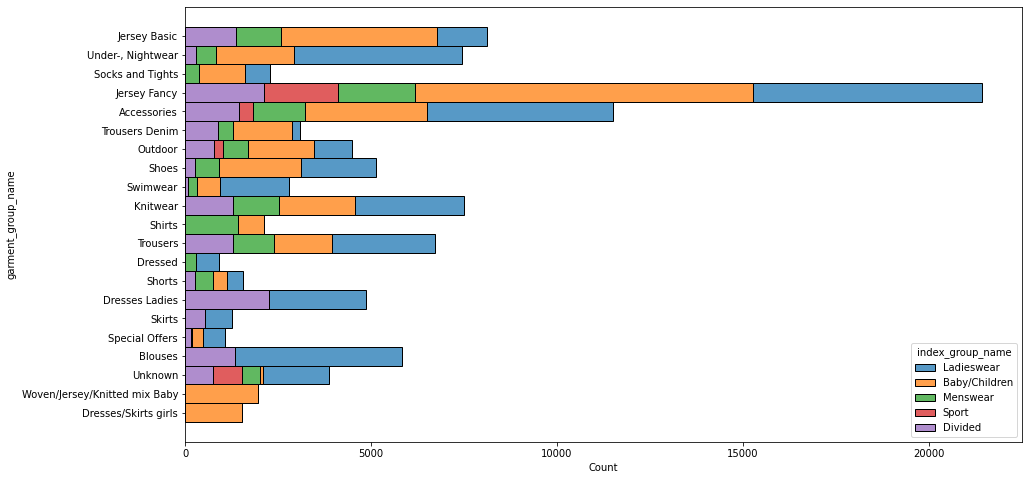

In [ ]:
fig, ax = plt.subplots(figsize=(15,8))
sns.histplot(ax=ax, data=article_df, y='garment_group_name', hue='index_group_name', multiple = "stack")

In [ ]:
article_df.groupby(['product_group_name','product_type_name']).count()['article_id']

product_group_name   product_type_name
Accessories          Accessories set         7
                     Alice band              6
                     Baby Bib                3
                     Bag                  1280
                     Beanie                 56
                                          ... 
Underwear            Underwear corset        7
                     Underwear set          47
Underwear/nightwear  Sleep Bag               6
                     Sleeping sack          48
Unknown              Unknown               121
Name: article_id, Length: 132, dtype: int64

In [ ]:
article_df.groupby(['index_group_name','index_name']).count()['article_id']

index_group_name  index_name                    
Baby/Children     Baby Sizes 50-98                   8875
                  Children Accessories, Swimwear     4615
                  Children Sizes 134-170             9214
                  Children Sizes 92-140             12007
Divided           Divided                           15149
Ladieswear        Ladies Accessories                 6961
                  Ladieswear                        26001
                  Lingeries/Tights                   6775
Menswear          Menswear                          12553
Sport             Sport                              3392
Name: article_id, dtype: int64

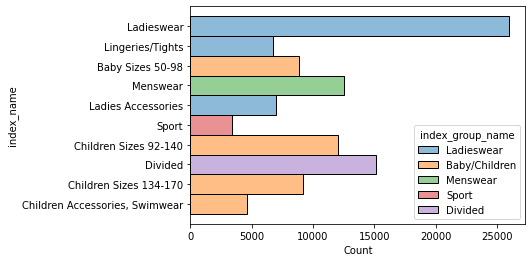

In [ ]:
sns.histplot(data=article_df, hue = 'index_group_name', y= 'index_name' )

In [ ]:
article_df.columns

Index(['article_id', 'product_code', 'prod_name', 'product_type_no',
       'product_type_name', 'product_group_name', 'graphical_appearance_no',
       'graphical_appearance_name', 'colour_group_code', 'colour_group_name',
       'perceived_colour_value_id', 'perceived_colour_value_name',
       'perceived_colour_master_id', 'perceived_colour_master_name',
       'department_no', 'department_name', 'index_code', 'index_name',
       'index_group_no', 'index_group_name', 'section_no', 'section_name',
       'garment_group_no', 'garment_group_name', 'detail_desc'],
      dtype='object')

In [ ]:
article_df.groupby(['perceived_colour_value_name','colour_group_name']).count()['article_id']

perceived_colour_value_name  colour_group_name
Bright                       Blue                 126
                             Dark Blue            432
                             Dark Green            66
                             Dark Orange          139
                             Dark Pink            218
                                                 ... 
Medium Dusty                 Turquoise             69
                             Yellow               286
                             Yellowish Brown      918
Undefined                    Other                105
Unknown                      Unknown               28
Name: article_id, Length: 149, dtype: int64

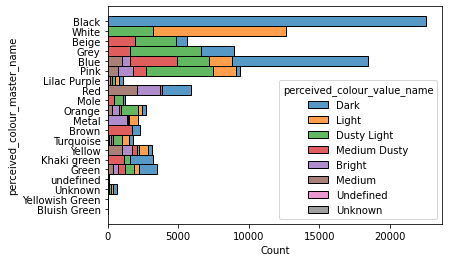

In [ ]:
sns.histplot(data=article_df, y = 'perceived_colour_master_name', hue = 'perceived_colour_value_name',multiple='stack')

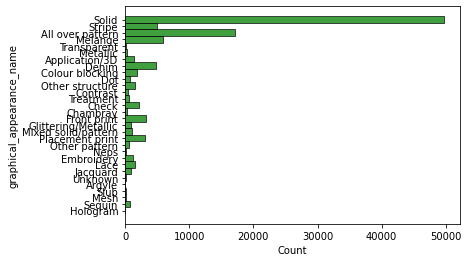

In [ ]:
# article_df.graphical_appearance_name.value_counts()
sns.histplot(data=article_df, y = 'graphical_appearance_name',color='green')

In [ ]:
# article_df.department_name.head(20)
# article_df.section_name.head(20)
article_df.groupby(['index_group_name','section_name', 'department_name']).count().article_id

index_group_name  section_name                   department_name                
Baby/Children     Baby Boy                       Baby Boy Jersey Fancy              872
                                                 Baby Boy Knitwear                  140
                                                 Baby Boy Outdoor                   205
                                                 Baby Boy Woven                     500
                  Baby Essentials & Complements  Baby Exclusive                     944
                                                                                   ... 
Sport             Ladies H&M Sport               Woven bottoms inactive from S.7      1
                  Men H&M Sport                  Men Sport Acc                      124
                                                 Men Sport Bottoms                  200
                                                 Men Sport Tops                     248
                                       

In [ ]:
article_df.groupby(['perceived_colour_value_name','perceived_colour_master_name', 'colour_group_name']).count().article_id

perceived_colour_value_name  perceived_colour_master_name  colour_group_name
Bright                       Blue                          Blue                 103
                                                           Dark Blue            432
                                                           Dark Purple            1
                                                           Other Blue            50
                             Green                         Dark Green            66
                                                                               ... 
Medium Dusty                 Yellow                        Dark Yellow           58
                                                           Light Yellow           1
                                                           Yellow               268
Undefined                    undefined                     Other                105
Unknown                      Unknown                       Unknown               28

In [ ]:
article_df.section_name.head(20)

0             Womens Everyday Basics
1             Womens Everyday Basics
2             Womens Everyday Basics
3                    Womens Lingerie
4                    Womens Lingerie
5                    Womens Lingerie
6     Womens Nightwear, Socks & Tigh
7     Womens Nightwear, Socks & Tigh
8     Womens Nightwear, Socks & Tigh
9     Womens Nightwear, Socks & Tigh
10    Womens Nightwear, Socks & Tigh
11     Baby Essentials & Complements
12     Baby Essentials & Complements
13                   Womens Lingerie
14                   Womens Lingerie
15            Womens Everyday Basics
16                     Men Underwear
17                     Men Underwear
18                     Men Underwear
19                     Men Underwear
Name: section_name, dtype: object

# Articles_EDA 1
![](https://images.velog.io/images/crosstar1228/post/cd816bb8-b713-4e0a-af2c-e0cd19660ce6/image.png)

## 1. body part
### `product_group` top 
  -  Garment upper -> Garment lower -> Garment full -> accesories -> underwear -> shoes
  -  `garment_group` top 
    -  Jersey fancy -> accesories -> jersey basic -> knitwear -> trousers

## 2. customer category
### `index` > `section` > `department`
 - Ladieswear -> Baby/Children -> Menswear -> Sport



## 3. Color & graphics

### `Color_master` : Black -> Blue -> White -> Pink -> Grey

### `graphical_appearance` : Solid -> All over pattern

#. Customer

In [ ]:
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,NaN,NaN,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,NaN,NaN,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,NaN,NaN,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,NaN,NaN,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customer_df[['FN','Active']] = customer_df[['FN','Active']].fillna(0)
customer_df.head()

,customer_id,FN,Active,club_member_status,fashion_news_frequency,age,postal_code
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0.0,0.0,ACTIVE,NONE,49.0,52043ee2162cf5aa7ee79974281641c6f11a68d276429a...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0.0,0.0,ACTIVE,NONE,25.0,2973abc54daa8a5f8ccfe9362140c63247c5eee03f1d93...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0.0,0.0,ACTIVE,NONE,24.0,64f17e6a330a85798e4998f62d0930d14db8db1c054af6...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0.0,0.0,ACTIVE,NONE,54.0,5d36574f52495e81f019b680c843c443bd343d5ca5b1c2...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,1.0,1.0,ACTIVE,Regularly,52.0,25fa5ddee9aac01b35208d01736e57942317d756b32ddd...


In [ ]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1371980 entries, 0 to 1371979
Data columns (total 7 columns):
 #   Column                  Non-Null Count    Dtype  
---  ------                  --------------    -----  
 0   customer_id             1371980 non-null  object 
 1   FN                      1371980 non-null  float64
 2   Active                  1371980 non-null  float64
 3   club_member_status      1365918 non-null  object 
 4   fashion_news_frequency  1355971 non-null  object 
 5   age                     1356119 non-null  float64
 6   postal_code             1371980 non-null  object 
dtypes: float64(3), object(4)
memory usage: 73.3+ MB


In [ ]:
customer_df.isnull().sum()

customer_id                   0
FN                            0
Active                        0
club_member_status         6062
fashion_news_frequency    16009
age                       15861
postal_code                   0
dtype: int64

In [ ]:
customer_df.postal_code.nunique()

352899

### correlation 0.98 FN & active -> feature deletion needed

In [ ]:
customer_df.FN.corr(customer_df.Active)

0.9799474839607816

In [ ]:
customer_df.club_member_status.value_counts()

ACTIVE        1272491
PRE-CREATE      92960
LEFT CLUB         467
Name: club_member_status, dtype: int64

In [ ]:
customer_df.fashion_news_frequency.value_counts()

NONE         877711
Regularly    477416
Monthly         842
None              2
Name: fashion_news_frequency, dtype: int64

In [ ]:
customer_df.age.max(), customer_df.age.min()

(99.0, 16.0)

In [ ]:
# 10대, 20대, 30대 등으로 age 구간 나누기
bins=[10*i for i in range(1,11)]
label = list(map(lambda x : str(x)+'s',bins))[:-1]
pie_data = pd.cut(customer_df.age, bins=bins,labels=label, right=True)

In [ ]:
pie_index = pie_data.value_counts().index
pie_value= pie_data.value_counts().values

- `FN`==`Active` : correlation 0.97
- `club_member_status`, `fashion_news_frequency` : one-hot encoding 등 예정
- `age` : 20->40->30->50->10
- postal code : 일단 보류

([<matplotlib.patches.Wedge at 0x7f85dd473810>,
 [Text(0.41186554618467197, 1.0199837115689654, '20s'),
  Text(-1.061566028555025, 0.2882317939053777, '40s'),
  Text(-0.8225579372995631, -0.7303413173205308, '30s'),
  Text(0.1428423393506947, -1.0906860529450357, '50s'),
  Text(0.8685046937199764, -0.6750552547653935, '10s'),
  Text(1.0734301751868454, -0.2403074260157989, '60s'),
  Text(1.099150585789534, -0.043220247090045155, '70s'),
  Text(1.0999958270568662, -0.0030299269762035534, '80s'),
  Text(1.0999999824920115, -0.00019625894764644942, '90s')],
 [Text(0.22465393428254832, 0.5563547517648901, '37.8'),
  Text(-0.5790360155754681, 0.15721734213020597, '16.0'),
  Text(-0.4486679657997616, -0.398367991265744, '15.6'),
  Text(0.0779140032821971, -0.5949196652427466, '15.5'),
  Text(0.47372983293816884, -0.36821195714476007, '9.3'),
  Text(0.5855073682837337, -0.13107677782679938, '4.7'),
  Text(0.5995366831579275, -0.023574680230933717, '1.1'),
  Text(0.5999977238491997, -0.0016526

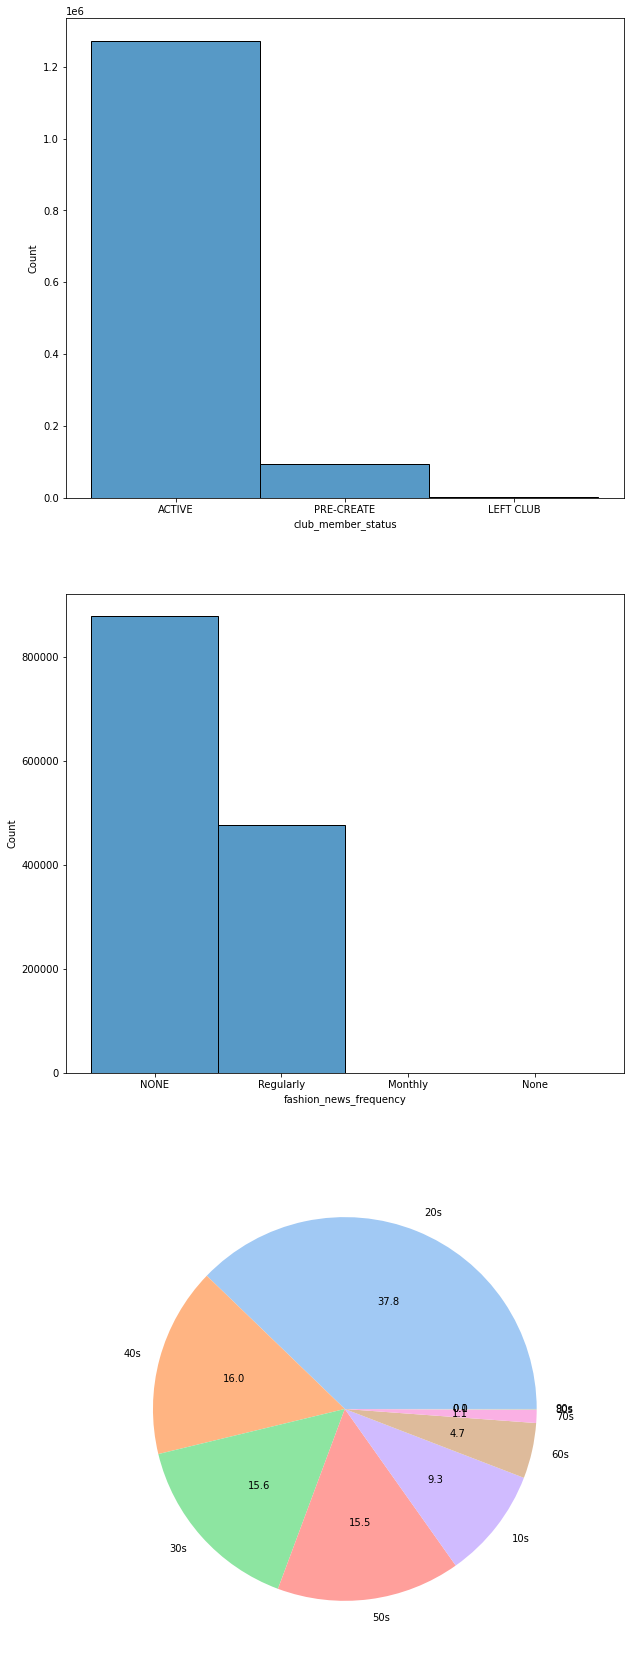

In [ ]:
fig, axes  = plt.subplots(3,1,figsize=(10,30))
sns.histplot(ax = axes[0],data=customer_df, x = 'club_member_status')
sns.histplot(ax = axes[1],data=customer_df, x = 'fashion_news_frequency')
colors = sns.color_palette('pastel')[0:10]

axes[2].pie(pie_value, labels=pie_index, colors=colors, autopct='%.1f')

# sns.histplot(ax = axes[3],data=customer_df, y = 'postal_code')

# Train_df

In [ ]:
train_df.head()

,t_dat,customer_id,article_id,price,sales_channel_id
0,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.050831,2
1,2018-09-20,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.030492,2
2,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.015237,2
3,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.016932,2
4,2018-09-20,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.016932,2


In [ ]:
train_df.shape

(31788324, 5)

In [ ]:
train_df.isnull().sum()

t_dat               0
customer_id         0
article_id          0
price               0
sales_channel_id    0
dtype: int64

In [ ]:
train_df.duplicated().sum()

2974905

In [ ]:
train_df.sales_channel_id.value_counts()

2    22379862
1     9408462
Name: sales_channel_id, dtype: int64

In [ ]:
train_df.t_dat.value_counts()

2019-09-28    198622
2020-04-11    162799
2019-11-29    160875
2018-11-23    142018
2018-09-29    141700
               ...  
2019-01-01     18145
2018-09-22     17635
2018-12-25     14799
2019-12-25     13637
2020-01-01     12760
Name: t_dat, Length: 734, dtype: int64

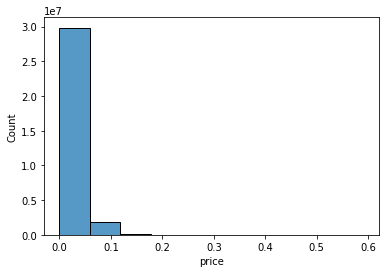

In [ ]:
sns.histplot(data=train_df, x='price', bins=10)

> ### 'price is the key feature determining the purchase. 
- There must be outlier... check it out

In [ ]:
pd.set_option('display.float_format', '{:.4f}'.format)
train_df.describe().price

count   31788324.0000
mean           0.0278
std            0.0192
min            0.0000
25%            0.0158
50%            0.0254
75%            0.0339
max            0.5915
Name: price, dtype: float64

Text(0.5, 1.0, 'price outliers')

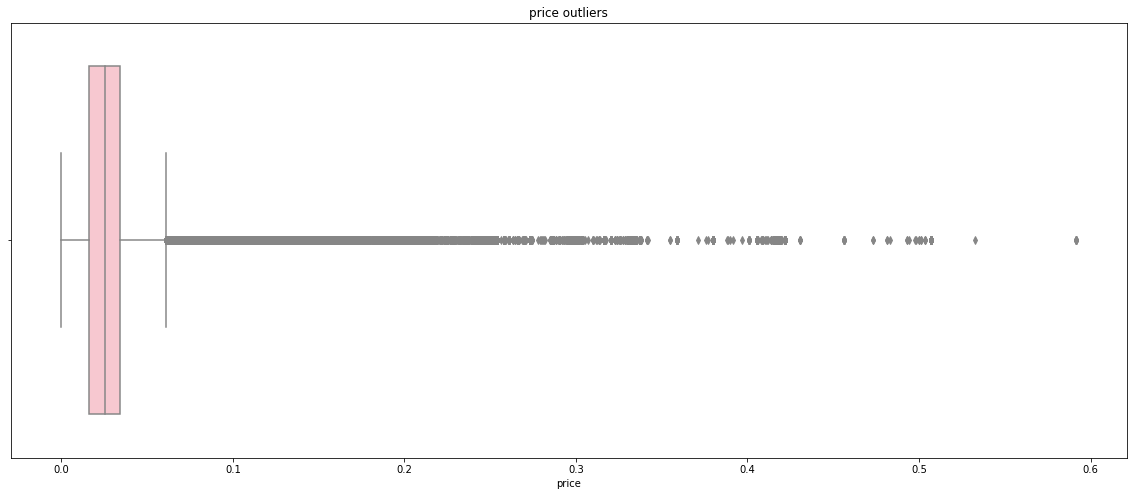

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
sns.boxplot(ax=ax, data=train_df, x='price', color='pink')
ax.set_title('price outliers', )

## Top 10 customers

In [ ]:
train_df.customer_id.value_counts()[:10]

be1981ab818cf4ef6765b2ecaea7a2cbf14ccd6e8a7ee985513d9e8e53c6d91b    1895
b4db5e5259234574edfff958e170fe3a5e13b6f146752ca066abca3c156acc71    1441
49beaacac0c7801c2ce2d189efe525fe80b5d37e46ed05b50a4cd88e34d0748f    1364
a65f77281a528bf5c1e9f270141d601d116e1df33bf9df512f495ee06647a9cc    1361
cd04ec2726dd58a8c753e0d6423e57716fd9ebcf2f14ed6012e7e5bea016b4d6    1237
55d15396193dfd45836af3a6269a079efea339e875eff42cc0c228b002548a9d    1208
c140410d72a41ee5e2e3ba3d7f5a860f337f1b5e41c27cf9bda5517c8774f8fa    1170
8df45859ccd71ef1e48e2ee9d1c65d5728c31c46ae957d659fa4e5c3af6cc076    1169
03d0011487606c37c1b1ed147fc72f285a50c05f00b9712e0fc3da400c864296    1157
6cc121e5cc202d2bf344ffe795002bdbf87178054bcda2e57161f0ef810a4b55    1143
Name: customer_id, dtype: int64

## Top 10 articles


In [ ]:
train_df.article_id.value_counts()

706016001    50287
706016002    35043
372860001    31718
610776002    30199
759871002    26329
             ...  
520736002        1
619777003        1
586904003        1
512385003        1
533261032        1
Name: article_id, Length: 104547, dtype: int64

# submission

In [ ]:
submission_df.head()

,customer_id,prediction
0,00000dbacae5abe5e23885899a1fa44253a17956c6d1c3...,0706016001 0706016002 0372860001 0610776002 07...
1,0000423b00ade91418cceaf3b26c6af3dd342b51fd051e...,0706016001 0706016002 0372860001 0610776002 07...
2,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,0706016001 0706016002 0372860001 0610776002 07...
3,00005ca1c9ed5f5146b52ac8639a40ca9d57aeff4d1bd2...,0706016001 0706016002 0372860001 0610776002 07...
4,00006413d8573cd20ed7128e53b7b13819fe5cfc2d801f...,0706016001 0706016002 0372860001 0610776002 07...


## Data Join
- make `articles_for_merge`

In [ ]:
# 예시
df1 = pd.DataFrame( {'name':['Bob', 'Jake', 'Lisa', 'Sue'], 'group':['Accounting', 'Engineering', 'Engineering', 'HR']} ) 
df2 = pd.DataFrame( {'name':['Bob', 'Jake', 'Lisa', 'Sue'], 'hire_date':[2004, 2008, 2012, 2014]} ) 
df3 = df1[['name']].merge(df2)
df3

,name,hire_date
0,Bob,2004
1,Jake,2008
2,Lisa,2012
3,Sue,2014


In [ ]:
articles_for_merge = article_df[['article_id', 'prod_name', 'product_type_name', 'product_group_name', 'index_name']]

In [ ]:
articles_for_merge = train_df[['customer_id', 'article_id', 'price', 't_dat']].merge(articles_for_merge, on='article_id', how='left')
articles_for_merge.head()

,customer_id,article_id,price,t_dat,prod_name,product_type_name,product_group_name,index_name
0,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,663713001,0.0508,2018-09-20,Atlanta Push Body Harlow,Underwear body,Underwear,Lingeries/Tights
1,000058a12d5b43e67d225668fa1f8d618c13dc232df0ca...,541518023,0.0305,2018-09-20,Rae Push (Melbourne) 2p,Bra,Underwear,Lingeries/Tights
2,00007d2de826758b65a93dd24ce629ed66842531df6699...,505221004,0.0152,2018-09-20,Inca Jumper,Sweater,Garment Upper body,Divided
3,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687003,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear
4,00007d2de826758b65a93dd24ce629ed66842531df6699...,685687004,0.0169,2018-09-20,W YODA KNIT OL OFFER,Sweater,Garment Upper body,Ladieswear


In [ ]:
# 고객 별 주문 수 체크
# articles_for_merge.groupby('customer_id').size().sort_values(ascending=False) # 이 코드로도 가능
count_per_customer = articles_for_merge.customer_id.value_counts()

In [ ]:
count_per_customer.describe()

count   1362281.0000
mean         23.3346
std          39.2423
min           1.0000
25%           3.0000
50%           9.0000
75%          27.0000
max        1895.0000
Name: customer_id, dtype: float64

In [ ]:
articles_for_merge.quantile(0.95)

article_id   870293002.0000
price                0.0593
Name: 0.95, dtype: float64

- 하위 25%는 모두 3번 이하로 클릭했음
- outlier가 심하네요..

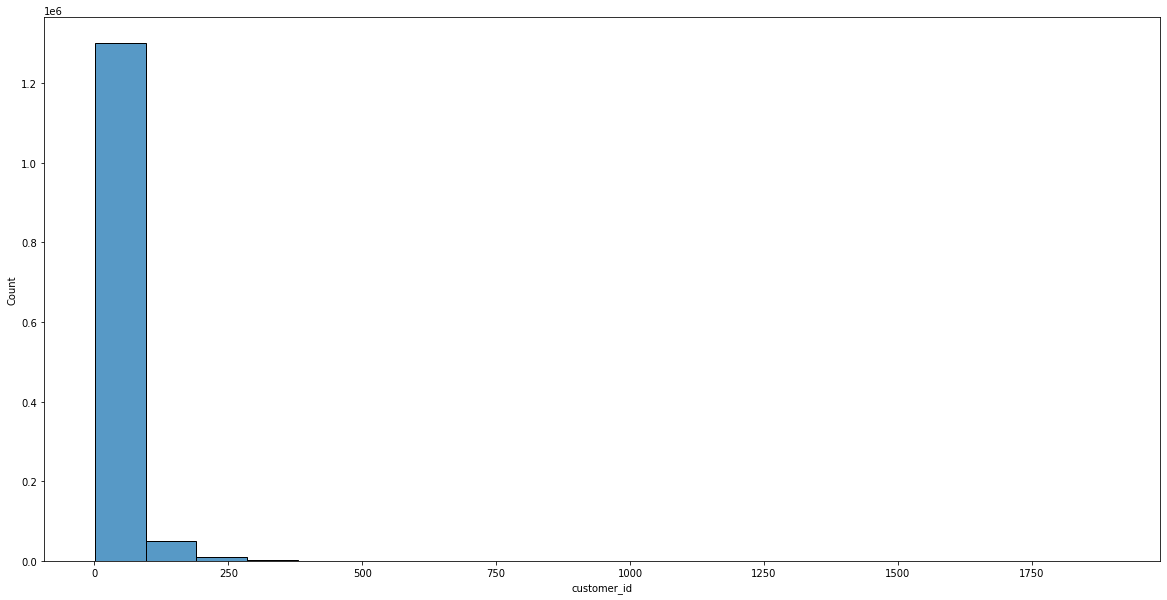

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
sns.histplot(ax = ax, x=count_per_customer,bins=20)

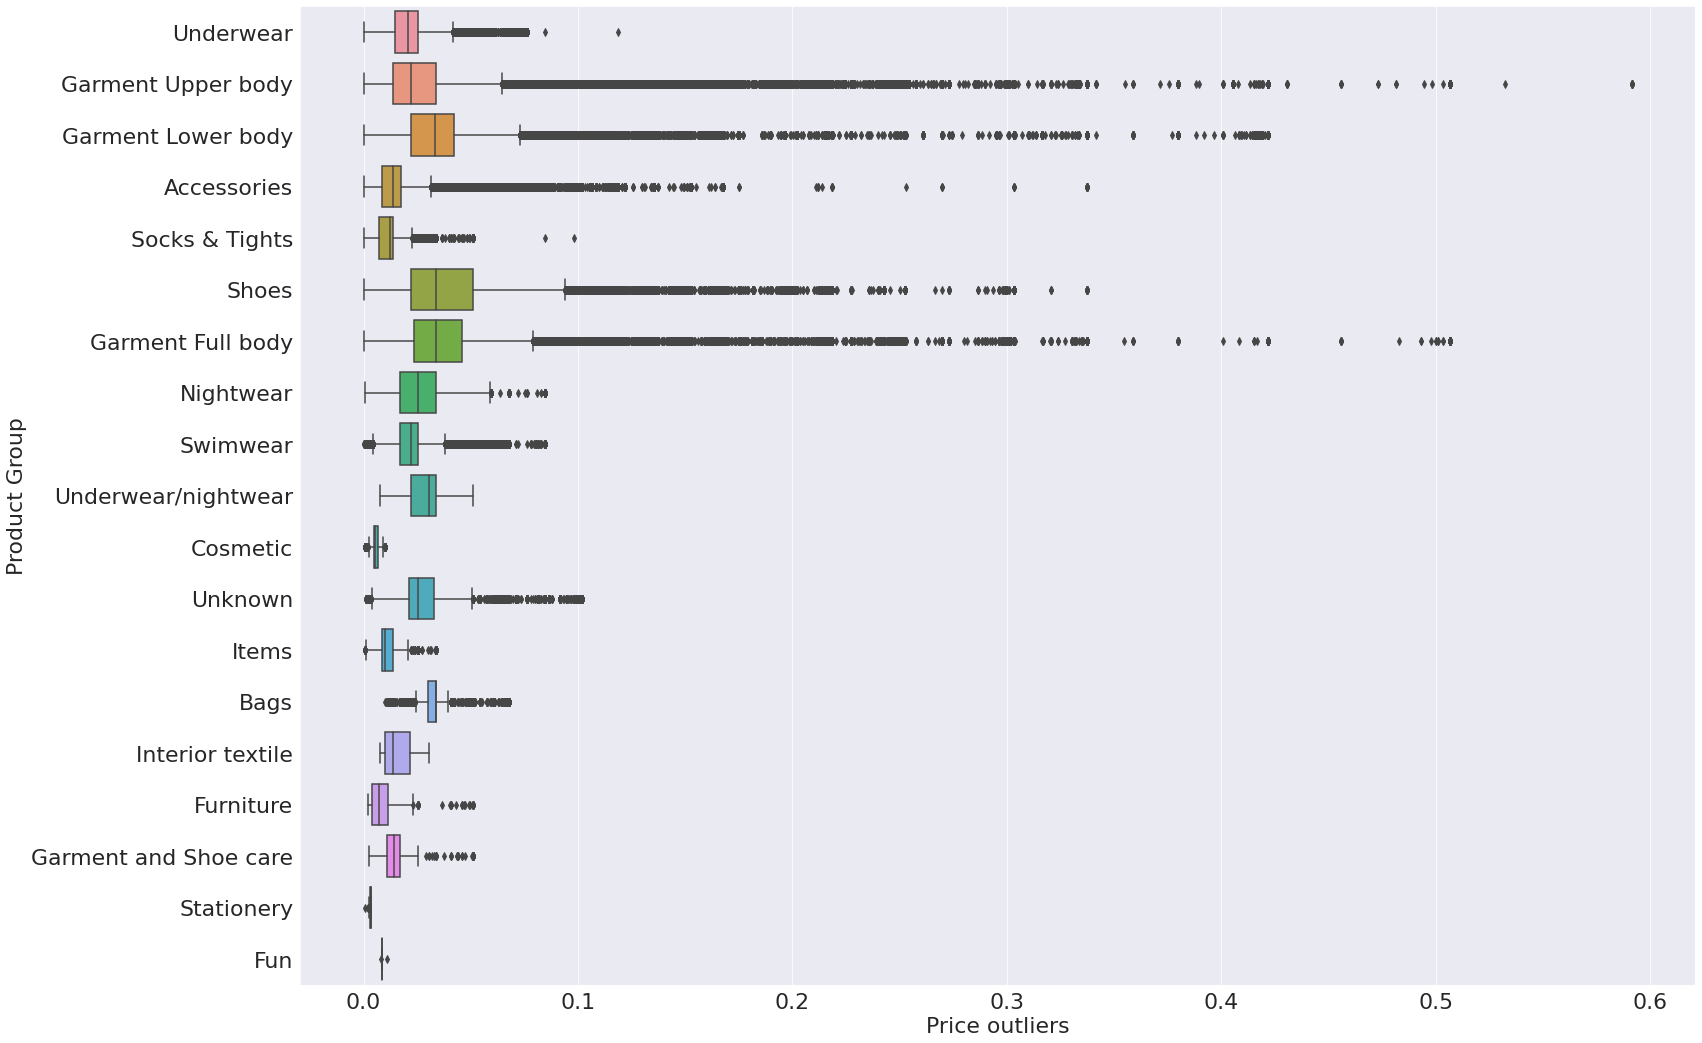

In [ ]:
sns.set_style("darkgrid")
f, ax = plt.subplots(figsize=(25,18))
sns.boxplot(ax= ax, data=articles_for_merge, x='price', y='product_group_name')
ax.set_xlabel('Price outliers', fontsize=22)
ax.set_ylabel('Product Group', fontsize=22)
ax.xaxis.set_tick_params(labelsize=22) # make bigger size of the text on the axis
ax.yaxis.set_tick_params(labelsize=22)


## Price Outlier가 굉장히 많음. 특히 절대적으로 수가 많은 Garment Upper/Lower/Full, accessory 등
### - 왜 price outlier가 많은지 알고싶다!

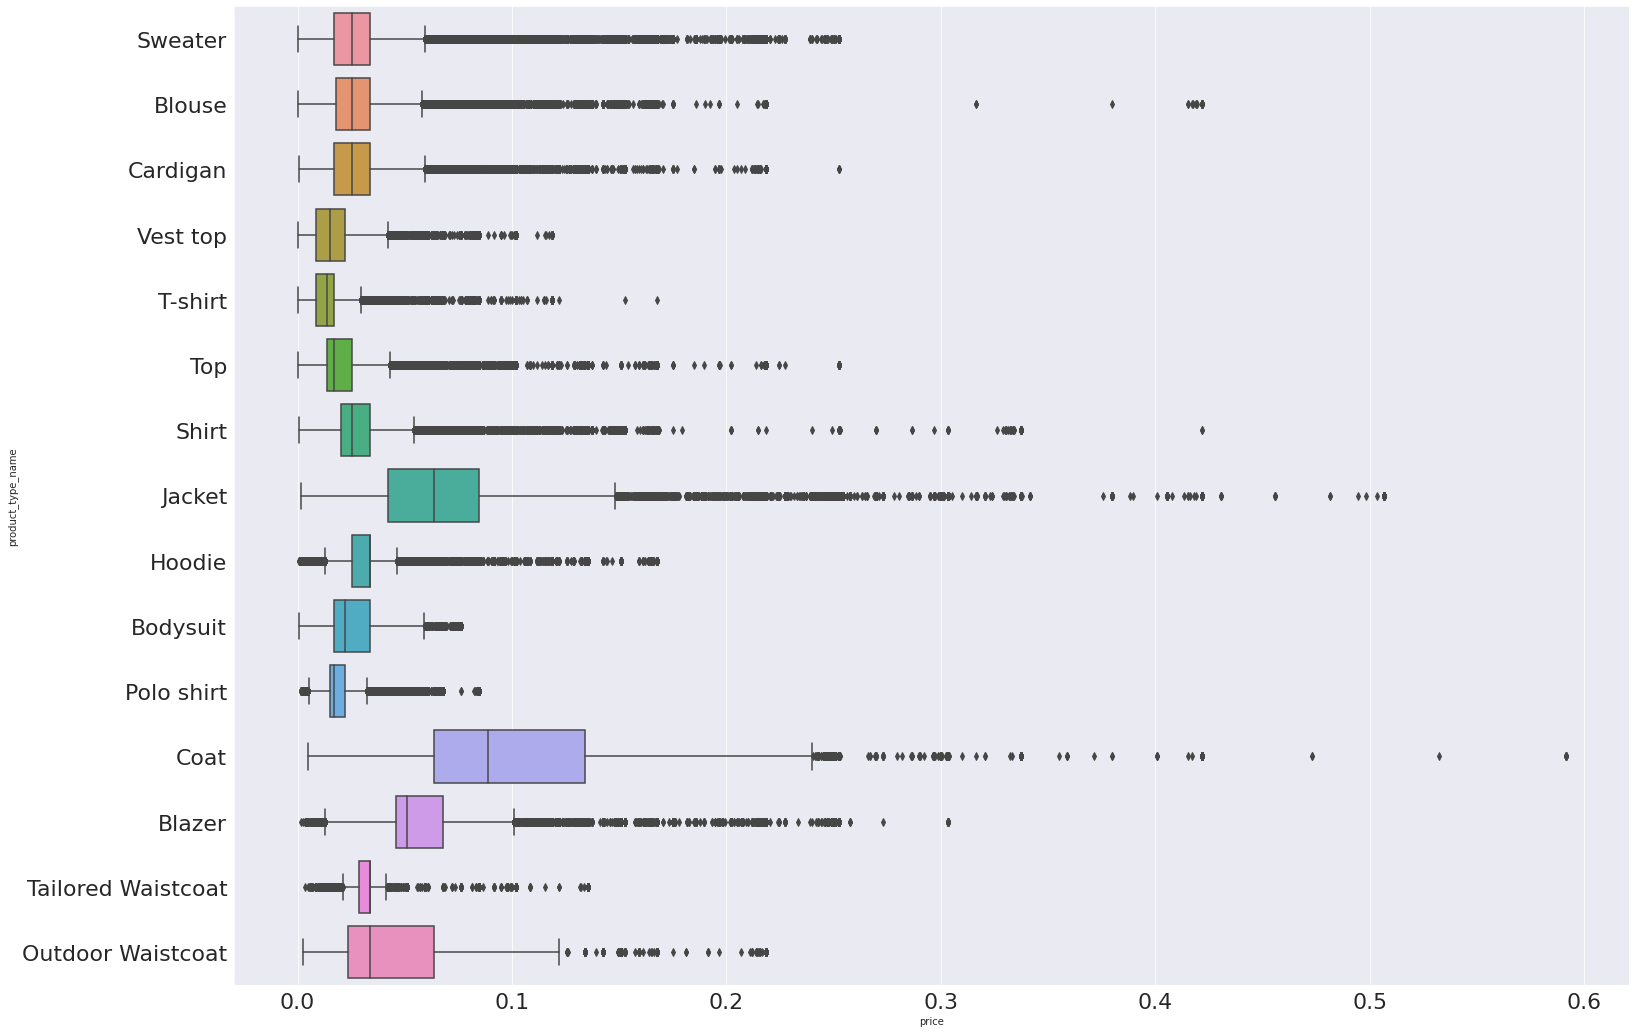

In [ ]:
# roduct_group_name VS jacket
data_garment = articles_for_merge[articles_for_merge['product_group_name']=='Garment Upper body']
f, ax = plt.subplots(figsize=(25,18))
sns.boxplot(ax=ax, data=data_garment, x = 'price', y= 'product_type_name')
ax.xaxis.set_tick_params(labelsize=22)
ax.yaxis.set_tick_params(labelsize=22)


# H&M Fashion(Recommendation with Pyspark)

### Collaborative Filtering : 다양한 유저들의 취향을 수집해서 추천해줌.(Item based와 달리 다른 유사한 유저의 선호도 정보가 필요함)
### Matrix Factorization : 이용자 * 평점 Matrix를 P와 Q로 행렬 분해
### Alternating Least Squares : Gradient Descent와 달리 P또는 Q를 고정시켜놓고 번갈아가며 최적화.
  - 분산처리 환겨엥서 더 빠른 연산이 가능
  - sparse한 data에 robust함



In [ ]:
!pip install pyspark

     |████████████████████████████████| 281.4 MB 40 kB/s 
     |████████████████████████████████| 198 kB 43.7 MB/s 
  Created wheel for pyspark: filename=pyspark-3.2.1-py2.py3-none-any.whl size=281853642 sha256=9aa23818a9a4aaef977af0447995345dff7842fb53de377a6c8619e4aefbb4da
  Stored in directory: /root/.cache/pip/wheels/9f/f5/07/7cd8017084dce4e93e84e92efd1e1d5334db05f2e83bcef74f
Successfully built pyspark


## `SparkSession` VS `SparkContext`

- `SparkContext` : RDD 생성
- `SparkSession` : 데이터프레임 연결 가능한 RDD 생성. 
  - 기존 `SparkContext` 버전에서 DataFrame 및 Dataset 기능이 호환되어 확장된 버젼.
  - SQL, HIVE, STREAMING API를 위해 따로 Context 생성할 필요 없음
  - 인스턴스 생성을 위해 `build()` 메서드 제공
- `SparkSQL` : 정형 데이터를 처리하기 위한 스파크의 패키지




In [ ]:
# 라이브러리 로드

import pyspark
# spark session을 위한 import
from pyspark.sql import SparkSession
# sql 자료형
from pyspark.sql.types import StructType,StructField, StringType, IntegerType 
from pyspark.sql.types import ArrayType, DoubleType, BooleanType
from pyspark.sql.functions import col,array_contains
# SQL 연산 위한 객체
from pyspark.sql import SQLContext 
# 추천시스템의 ALS 기능
from pyspark.ml.recommendation import ALS
# 
from pyspark.sql.functions import udf,col,when
# 날짜연산
from pyspark.sql.functions import to_timestamp,date_format

import numpy as np
import pandas as pd
from pyspark.sql.types import *
from pyspark.sql.functions import *
from pyspark.sql.window import *

# Sparksession 객체 생성
sc = SparkSession.builder.appName("Recommendations").config("spark.sql.files.maxPartitionBytes", 5000000).getOrCreate()
spark = SparkSession(sc)

### spark 이용해서 데이터셋을 로딩해 봅시다!

In [ ]:
spark

In [ ]:
# transaction 파일 읽어들이기
transaction = spark.read.option("header", True).csv("/content/kaggle_h_and_m/transactions_train.csv")
# Schema 출력
transaction.printSchema()

root
 |-- t_dat: string (nullable = true)
 |-- customer_id: string (nullable = true)
 |-- article_id: string (nullable = true)
 |-- price: string (nullable = true)
 |-- sales_channel_id: string (nullable = true)



> 데이터프레임으로 취급하고 `.select` 함수 바로 이용 가능

In [ ]:
# 최대 최솟값 출력하기

from pyspark.sql.functions import min, max
from pyspark.sql.functions import unix_timestamp, lit
min_date, max_date = transaction.select(min("t_dat"), max("t_dat")).first()
min_date, max_date

('2018-09-20', '2020-09-22')

> `withColumn()`은 새로운 칼럼 추가하거나, 기존 칼럼 바꾸거나, column datatype을 바꾸거나 하는 데에 이용되는 함수

원래 transaction data에서
- 2020년 09월 22일것만 남기기
- `Customer id`, `Article id` 만 남기기 : 고객이 산 제품 정보만 남기기

In [ ]:
hm = transaction.withColumn('t_dat', transaction['t_dat'].cast('string')) # string type으로 변경
hm = hm.withColumn('date', from_unixtime(unix_timestamp('t_dat', 'yyyy-MM-dd'))) # 모듈 활용하여  date 생성

# hm
hm = hm.withColumn('year', year(col('date')))
hm = hm.withColumn('month', month(col('date')))
hm = hm.withColumn('day', date_format(col('date'), "d"))

# 추천을 위한 마지막 날인 2020년 9월 22일자의 날짜만 추출
hm = hm[hm['year'] == 2020]
hm = hm[hm['month'] == 9]
hm = hm[hm['day'] == 22]

# DataFrame을 Marking, 메모리와 disk로부터 모든 블럭을 제거
transaction.unpersist()

# Prepare the dataset
# customer id와 article id로 groupby

hm = hm.groupby('customer_id', 'article_id').count()
hm.show(5)

+--------------------+----------+-----+
|         customer_id|article_id|count|
+--------------------+----------+-----+
|00f7bc5c0df4c615b...|0780418013|    1|
|02094817e46f3b692...|0791587001|    1|
|0333e5dda0257e9f4...|0839332002|    2|
|07c7a1172caf8fb97...|0573085043|    1|
|081373184e601470c...|0714790020|    1|
+--------------------+----------+-----+
only showing top 5 rows



In [ ]:
# dataframe shape 출력
print((hm.count(), len(hm.columns)))

(29486, 3)


> Sparsity : 1 - (중복 포함한 article 개수) / (unique유저 수 * article 수)

  - 중복 포함한  개수 >>unique 수 : sparse 함
  - 중복 포함한 개수 << unique 수 : sparse하지 않음
  

In [ ]:
# article 개수
numerator = hm.select("count").count()

# customer id, article id 유니크한 개수 세기
num_users = hm.select("customer_id").distinct().count()
num_articles = hm.select("article_id").distinct().count()

denominator = num_users * num_articles
# Divide the numerator by the denominator
sparsity = (1.0 - (numerator *1.0)/denominator)*100
print("Sparsity: ", "%.2f" % sparsity + "%.")

Sparsity:  99.96%.


In [ ]:
# customer id 별 개수
userId_count = hm.groupBy("customer_id").count().orderBy('count', ascending=False) # customer_id 로만 groupby
userId_count.show()

+--------------------+-----+
|         customer_id|count|
+--------------------+-----+
|30b6056bacc5f5c9d...|   28|
|5e8fb4d457fdffc61...|   28|
|dc1b173e541f8d3c1...|   27|
|6335d496ef463bc40...|   25|
|1796e87fd2e88932b...|   25|
|f50287d9cf052d4b4...|   24|
|54e8ebd39543b5a4d...|   23|
|fd5ce8716faf00f6a...|   23|
|850ec77661a417d27...|   22|
|ad3663a848dccbdda...|   21|
|32f3a6a7ce63d302c...|   21|
|b606fe5786c00151a...|   21|
|298523b6637340717...|   21|
|b49647f84a99ced53...|   21|
|fc783381f1ea2174c...|   21|
|a08e284bb18add2d7...|   21|
|383e1b07e2c1fe169...|   21|
|3ca77aab50ae4532b...|   20|
|2a721767cd9864ed5...|   20|
|af5166e0f89b0d433...|   19|
+--------------------+-----+
only showing top 20 rows



In [ ]:
# article 별 개수
articleId_count = hm.groupBy("article_id").count().orderBy('count', ascending=False)
articleId_count.show()

+----------+-----+
|article_id|count|
+----------+-----+
|0924243002|   91|
|0918522001|   88|
|0866731001|   78|
|0751471001|   75|
|0448509014|   73|
|0714790020|   72|
|0762846027|   68|
|0928206001|   67|
|0893432002|   66|
|0918292001|   65|
|0915529005|   64|
|0788575004|   63|
|0915529003|   63|
|0863583001|   60|
|0930380001|   59|
|0573085028|   59|
|0919273002|   58|
|0850917001|   57|
|0573085042|   56|
|0874110016|   53|
+----------+-----+
only showing top 20 rows



In [ ]:
# ALS 및 Regression 평가 metric(pyspark용) import
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS

## 6. String을 index로 변환
- ALS가 integer value만을  parameter로 받음. 그 조건을 충족하기 위해서, customer_id 와 article_id를 index form으로 변경
- integer로 변환하는 나름의 방법이 있는건가?



In [ ]:
from pyspark.ml.feature import StringIndexer
from pyspark.ml import Pipeline 
from pyspark.sql.functions import col


indexer = [StringIndexer(inputCol = column, outputCol = column+"_index") for column in list(set(hm.columns)-set(['count']))] # count 빼고 coustomer_id 랑 article_id integer로 변환
pipeline = Pipeline(stages= indexer) # Pipeline 생성
transformed = pipeline.fit(hm).transform(hm) # fit_transform
transformed.show()


+--------------------+----------+-----+-----------------+----------------+
|         customer_id|article_id|count|customer_id_index|article_id_index|
+--------------------+----------+-----+-----------------+----------------+
|00f7bc5c0df4c615b...|0780418013|    1|            783.0|          2237.0|
|02094817e46f3b692...|0791587001|    1|            785.0|            35.0|
|0333e5dda0257e9f4...|0839332002|    2|           4098.0|           732.0|
|07c7a1172caf8fb97...|0573085043|    1|           1702.0|            44.0|
|081373184e601470c...|0714790020|    1|           4146.0|             5.0|
|09bec2a61046ccbea...|0860336002|    1|           6792.0|          2368.0|
|0be4f1ecce204ee32...|0573085028|    1|            799.0|            14.0|
|0c4b30343292b5101...|0918522001|    1|           6825.0|             1.0|
|0e10e02358875468b...|0579541001|    1|           2689.0|            53.0|
|0fc371e67e61a31d7...|0907170001|    1|           1737.0|          1978.0|
|10817b19177f6a53e...|071

## 7. Train/Test 데이터 만들기
- 

In [ ]:
#randomSplit method 사용
(training, test) = transformed.randomSplit([0.8, 0.2])

## 8. ALS model 만들기 및 data fitting
- explicit하게 모델링하기 위해 칼럼을 특정합니다. 
  - nonnegative = `True` (count값이 0보다 크므로)
  - model이 implicit data에 대한 옵션도 주지만 default(False)로 냅두면 explicit 만 취급
- spark에서 `CrossValidator` 나 `TrainValidationSplit`을 쓸경우, eval set에 있는 데이터가 training set에 없는 경우가 있음.
  - `coldStartStrategy`="drop" : Spark가 prediction을 NaN으로 하는 경우를 막아줌. 

 

In [ ]:
als = ALS(maxIter=5, regParam=0.09, rank=25,
          userCol = "customer_id_index",
          itemCol = "article_id_index",
          ratingCol="count",
          coldStartStrategy="drop",
          nonnegative= True
          )
model = als.fit(training)


## 9. RMSE 평가


In [ ]:
evaluator=RegressionEvaluator(metricName="rmse",labelCol="count",predictionCol="prediction")
predictions=model.transform(test)
rmse=evaluator.evaluate(predictions)

In [ ]:
print("RMSE="+str(rmse))


RMSE=0.4861898582064279


## 10. 예측 생성

In [ ]:
predictions.show()

+--------------------+----------+-----+-----------------+----------------+----------+
|         customer_id|article_id|count|customer_id_index|article_id_index|prediction|
+--------------------+----------+-----+-----------------+----------------+----------+
|279874c4d0ed6623c...|0894956008|    1|           1829.0|           890.0|0.71246547|
|76047cb1a793838b3...|0873279005|    1|           2122.0|            20.0|0.86313903|
|970bdc24215ac9cb6...|0804992017|    1|            471.0|           194.0| 1.0609884|
|970bdc24215ac9cb6...|0918292001|    1|            471.0|             9.0| 1.0391222|
|b4db5e5259234574e...|0936726001|    1|           2366.0|          4079.0|0.71971613|
|c61f3119ea64671ca...|0875217002|    1|            496.0|           874.0| 0.9842572|
|ebf4b3eb56d695609...|0611415001|    1|           6466.0|           414.0|  0.849535|
|f33b01d62c213df7e...|0598755001|    1|           3997.0|           522.0| 0.5876423|
|f33b01d62c213df7e...|0906352001|    1|           3997

## 11. Article id로 추천하기

In [ ]:
user_recs=model.recommendForAllItems(10).show(10)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+----------------+--------------------+
|article_id_index|     recommendations|
+----------------+--------------------+
|               1|[{4907, 5.4355893...|
|               3|[{4907, 4.8922596...|
|               5|[{4907, 6.213204}...|
|               6|[{4907, 5.310077}...|
|               9|[{4907, 5.147522}...|
|              12|[{4907, 4.8755975...|
|              13|[{4907, 5.516327}...|
|              15|[{9001, 5.1167836...|
|              16|[{4907, 5.3251595...|
|              17|[{4907, 4.444177}...|
+----------------+--------------------+
only showing top 10 rows



## 12. Customer id로 추천하기

In [ ]:
item_recs=model.recommendForAllUsers(10).show(10)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


+-----------------+--------------------+
|customer_id_index|     recommendations|
+-----------------+--------------------+
|                1|[{5040, 2.8479674...|
|                3|[{6383, 3.4140778...|
|                5|[{6383, 4.5007353...|
|                6|[{5040, 7.1069937...|
|                9|[{1891, 2.3157568...|
|               12|[{1891, 2.7998}, ...|
|               13|[{1891, 2.9840126...|
|               15|[{1891, 2.4920838...|
|               16|[{1661, 2.6675706...|
|               17|[{1891, 2.4383733...|
+-----------------+--------------------+
only showing top 10 rows



In [ ]:
%%time
userRecsDf = model.recommendForAllUsers(10).cache()
userRecsDf.count()

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


CPU times: user 165 ms, sys: 17.5 ms, total: 182 ms
Wall time: 23.7 s


In [ ]:
userRecsDf.printSchema()

root
 |-- customer_id_index: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- article_id_index: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)



In [ ]:
userRecsDf.select("customer_id_index","recommendations.article_id_index").show(10,False)

+-----------------+------------------------------------------------------------+
|customer_id_index|article_id_index                                            |
+-----------------+------------------------------------------------------------+
|1580             |[1661, 1891, 5040, 6383, 3870, 5111, 3031, 2511, 3539, 1035]|
|4900             |[1661, 1891, 5040, 6383, 2511, 3870, 5111, 3031, 6848, 1035]|
|5300             |[1661, 1891, 6383, 5040, 3870, 3031, 4894, 6874, 1035, 2511]|
|6620             |[5040, 6383, 1891, 1661, 3870, 5111, 6874, 4910, 3869, 3031]|
|7340             |[1891, 1661, 3870, 6874, 5111, 2866, 2511, 6383, 5040, 3230]|
|7880             |[1891, 3031, 1661, 3013, 7603, 690, 5040, 6383, 6944, 7828] |
|9900             |[6383, 5040, 2716, 5111, 1891, 610, 2917, 1765, 2151, 3870] |
|471              |[1891, 1661, 3870, 6944, 3031, 3869, 4910, 5111, 6848, 3013]|
|1591             |[1661, 1891, 5040, 6383, 3870, 3031, 5111, 5891, 7093, 610] |
|4101             |[1661, 68

In [ ]:
import gc #This is to free up the memory
gc.collect()

339

## 13. 다시 string type으로 바꾸어주기(원래 id)

In [ ]:
from pyspark.ml.evaluation import RegressionEvaluator
from pyspark.ml.recommendation import ALS
from pyspark.sql import Row
import pandas as pd
recs=model.recommendForAllUsers(10).toPandas()
nrecs=recs.recommendations.apply(pd.Series) \
            .merge(recs, right_index = True, left_index = True) \
            .drop(["recommendations"], axis = 1) \
            .melt(id_vars = ['customer_id_index'], value_name = "recommendations") \
            .drop("variable", axis = 1) \
            .dropna() 
nrecs=nrecs.sort_values('customer_id_index')
nrecs=pd.concat([nrecs['recommendations'].apply(pd.Series), nrecs['customer_id_index']], axis = 1)

/usr/local/lib/python3.7/dist-packages/pyspark/sql/context.py:127: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  FutureWarning


In [ ]:
nrecs.columns = ['ArticleID_index','count','UserID_index']
md=transformed.select(transformed['article_id'],transformed['article_id_index'],transformed['customer_id'],transformed['customer_id_index'])
md=md.toPandas()

In [ ]:
dict1 =dict(zip(md['article_id_index'],md['article_id']))
dict2=dict(zip(md['customer_id_index'],md['customer_id']))
nrecs['article_id']=nrecs['ArticleID_index'].map(dict1)
nrecs['customer_id']=nrecs['UserID_index'].map(dict2)

In [ ]:
nrecs=nrecs.sort_values('customer_id')
nrecs.reset_index(drop=True, inplace=True)
new=nrecs[['customer_id','article_id','count']]
new['recommendations'] = list(new.article_id)
res=new[['customer_id','recommendations']]  
res_new=res['recommendations'].groupby([res.customer_id]).apply(list).reset_index()
#print(res_new)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [ ]:
res_new[:15]

,customer_id,recommendations
0,0003e867a930d0d6842f923d6ba7c9b77aba33fe2a0fbf...,"[0904961003, 0724905016, 0757971006, 082748700..."
1,0010e8eb18f131e724d6997909af0808adbba057529edb...,"[0857347002, 0894481001, 0871638002, 075797100..."
2,001436e2c83cda28548dd668cfc7d621d70d2baf6f6cf0...,"[0894481001, 0757971006, 0825109005, 085734700..."
3,0026ebdd70715d8fa2befa14dfed317a1ffe5451aba839...,"[0894481001, 0757971006, 0750330003, 086626100..."
4,002faf80a68267264102e08eb4f1f21a59236773e4ab90...,"[0750330003, 0297078008, 0857347002, 090496100..."
5,00357b192b81fc83261a45be87f5f3d59112db7d117513...,"[0750330003, 0885315003, 0750481010, 081656300..."
6,0049f94e2289eed627a49f2a5a6418bc8ce6ee7e2a902d...,"[0885315003, 0400285006, 0904961003, 075048101..."
7,004d932f7a27ac3167c77db81d9cfd89392729e7f7e0d4...,"[0297078008, 0904961001, 0894481001, 090496100..."
8,0059a72dc89bd3a2bd42e523d98567a0f1acd1f7046f9b...,"[0750330003, 0894481001, 0871638002, 086626100..."
9,0066eb743279371828aba20039e5a69b60acd872985b00...,"[0866261001, 0750481010, 0871638002, 089448100..."
